In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import sparse

In [2]:
def jacobi_1(A, b, tol, maxiters):
    # This is an implementation of the Jacobi method
    d = np.diag(A)
    d_inv = d**(-1)
    iters = 0
    
    x = np.zeros(b.shape)
    x_old = x.copy()
    diff = 1
    while (diff > tol) and (iters < maxiters):
        temp = b-np.dot(A, x_old)
        x = x_old + d_inv*temp
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1

    return x

In [3]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [4]:
A = diag_dom(10)
b =  np.random.random(10)
x = jacobi_1(A,b, 1e-8, 1000)
print(np.allclose(np.dot(A, x), b))

True


## Problem 2

In [5]:
def jacobi_2(A, b, tol, maxiters, plot = False):
    # This is an implementation of the Jacobi method
    d = np.diag(A)
    d_inv = d**(-1)
    iters = 0
    
    x = np.zeros(b.shape)
    x_old = x.copy()
    diff = 1
    diffL = [1]
    while (diff > tol) and (iters < maxiters):
        temp = b-np.dot(A, x_old)
        x = x_old + d_inv*temp
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
    
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of jacobi Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x

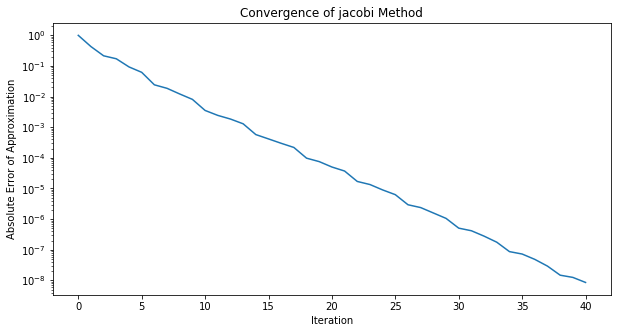

In [6]:
A = diag_dom(10)
b =  np.random.random(10)
Ax = jacobi_2(A,b, 1e-8, 1000, plot=True)

## Problem 3

In [35]:
def gauss_seidel_3(A, b, tol=1e-5, maxiters=1000, plot=False):
    iters = 0
    diff = 1
    diffL = [1]
    
    x = np.zeros_like(b)
    x_old = x.copy()
    a = np.diag(A)
    while (iters <maxiters) and (diff > tol):
        x = x_old + a**(-1)*(b-np.dot(A, x_old))
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
    
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of Gauss Seidel Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x


def gauss_seidel_3_v2(A, b, tol=1e-5, maxiters=1000, plot=False):
    iters = 0
    diff = 1
    diffL = [1]
    
    x = np.zeros_like(b)
    x_old = x.copy()
    while (iters <maxiters) and (diff > tol):
        for i in range(b.shape[0]):
            x[i] = x_old[i] + (1/A[i, i])*(b[i]-np.dot(A[i,:], x_old))
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
        
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of Gauss Seidel Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x

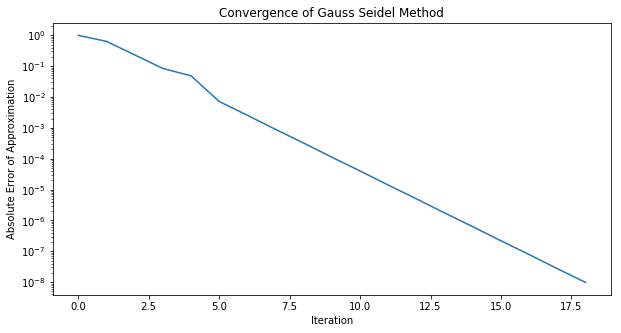

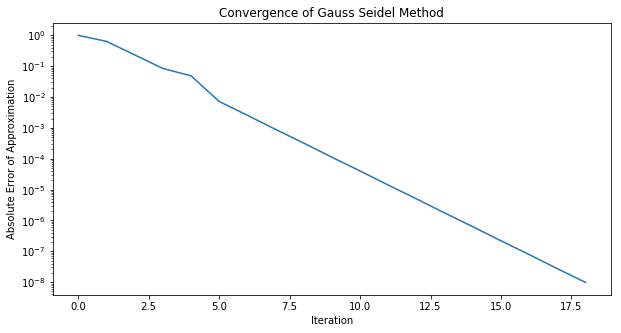

In [36]:
A = diag_dom(10)
b =  np.random.random(10)
x = gauss_seidel_3(A,b, 1e-8, 1000, plot=True)
x2 = gauss_seidel_3_v2(A,b, 1e-8, 1000, plot=True)

In [37]:
print(np.allclose(np.dot(A, x), b))
print(np.allclose(np.dot(A, x2), b))

True
True


## Problem 4

In [10]:
def gauss_seidel_4(A, b, tol=1e-5, maxiters=1000, plot=False):
    iters = 0
    diff = 1
    diffL = [1]
    
    x = np.zeros_like(b)
    x_old = x.copy()
    while (iters <maxiters) and (diff > tol):
        print(iters)
        for i in range(b.shape[0]):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] = x_old[i] + (1/A[i, i])*(b[i]-Aix)
            
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
        
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of jacobi Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x

In [ ]:
A = diag_dom(50000)
print('Created A')
A_s = sparse.csr_matrix(A)
b = np.random.random(50000)
x = gauss_seidel_4(A_s, b)
x_2 = gauss_seidel_3(A, b)
print(np.allclose(A_s @ x, b))
print(np.allclose(np.dot(A, x), b))

## Problem 5

In [43]:
def gauss_seidel_5(A, b, w, tol=1e-5, maxiters=1000, plot=False):
    iters = 0
    diff = 1
    diffL = [1]
    
    x = np.zeros_like(b)
    x_old = x.copy()
    a = np.diag(A)
    while (iters <maxiters) and (diff > tol):
        x = x_old +1/w * (a**(-1)*(b-np.dot(A, x_old)))
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
    
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of jacobi Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x

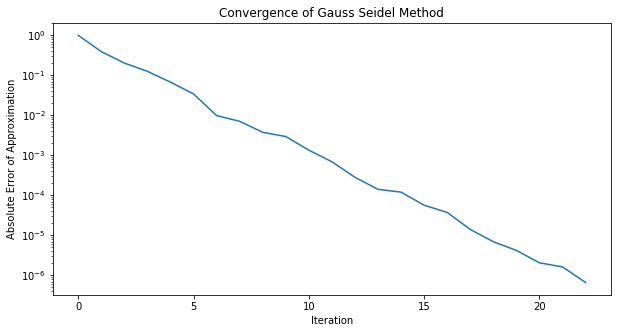

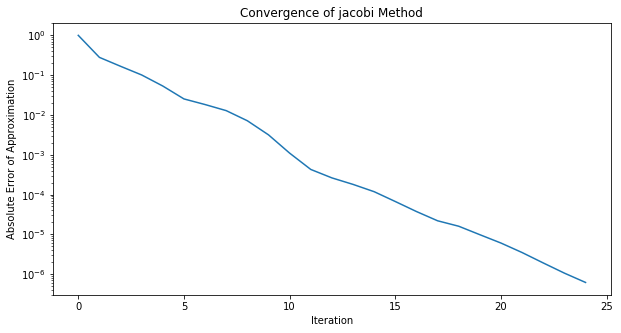

In [46]:
A = diag_dom(10)
b =  np.random.random(10)
x = gauss_seidel_3(A,b, 1e-6, 100, plot=True)
x2 = gauss_seidel_5(A,b, 1.4, 1e-6, 100, plot=True)

## Problem 6

In [144]:
def generate_6(n):
    B = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1) + \
    np.diag(np.ones(n)*-4, 0)
    A = np.kron(np.eye(n), B) + np.kron(np.diag(np.ones(n-1), 1), \
    np.eye(n)) +np.kron(np.diag(np.ones(n-1), -1), np.eye(n))
    
    b_s = np.eye(1,n,n-1)*-100 + np.eye(1, n, 0)*-100
    b = np.tile(b_s, n).reshape(n*n,)
    
    return A, b


def gauss_seidel_6(n, w, tol=1e-8, maxiters=100, plot=False):
    A, b = generate_6(n)
    iters = 0
    diff = 1
    diffL = [1]
    
    x = np.zeros_like(b)
    x_old = x.copy()
    a = np.diag(A)
    while (iters <maxiters) and (diff > tol):
        if iters % 100 == 0:
            print('Iteration: ', iters, " is done.")
        x = x_old +1/w * (a**(-1)*(b-np.dot(A, x_old)))
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
    
    print('Number of iterations to convergence: ', iters)
    
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of Gauss Seidel Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x.reshape(n, n)

Iteration:  0  is done.
Iteration:  100  is done.
Iteration:  200  is done.
Iteration:  300  is done.
Iteration:  400  is done.
Iteration:  500  is done.
Iteration:  600  is done.
Iteration:  700  is done.
Iteration:  800  is done.
Iteration:  900  is done.
Iteration:  1000  is done.
Iteration:  1100  is done.
Iteration:  1200  is done.
Iteration:  1300  is done.
Iteration:  1400  is done.
Iteration:  1500  is done.
Iteration:  1600  is done.
Iteration:  1700  is done.
Iteration:  1800  is done.
Iteration:  1900  is done.
Iteration:  2000  is done.
Iteration:  2100  is done.
Iteration:  2200  is done.
Iteration:  2300  is done.
Iteration:  2400  is done.
Iteration:  2500  is done.
Iteration:  2600  is done.
Iteration:  2700  is done.
Iteration:  2800  is done.
Iteration:  2900  is done.
Iteration:  3000  is done.
Iteration:  3100  is done.
Iteration:  3200  is done.
Iteration:  3300  is done.
Iteration:  3400  is done.
Iteration:  3500  is done.
Iteration:  3600  is done.
Iteration:  3

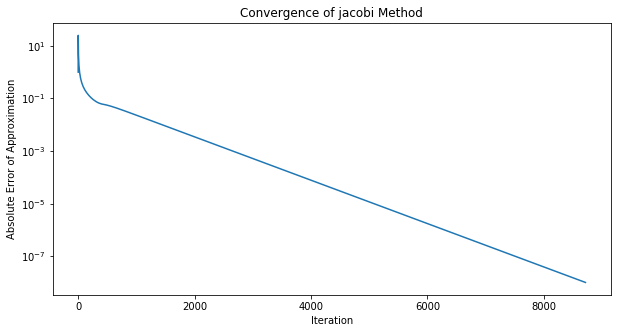

In [150]:
u = gauss_seidel_6(50, 1,maxiters=20000, plot=True)

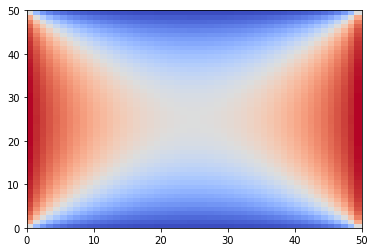

In [151]:
plt.pcolormesh(u, cmap='coolwarm')
plt.show()

## Problem 7

In [191]:
def gauss_seidel_7(n, w, tol=1e-8, maxiters=100, plot=False):
    A, b = generate_6(n)
    iters = 0
    diff = 1
    diffL = [1]
    
    x = np.zeros_like(b)
    x_old = x.copy()
    a = np.diag(A)
    while (iters <maxiters) and (diff > tol):
        x = x_old + w*(a**(-1)*(b-np.dot(A, x_old)))
        diff = np.linalg.norm(x-x_old, np.inf)
        x_old = x.copy()
        iters +=1
        diffL.append(diff)
    
    if plot == True:
        fig, ax = plt.subplots(figsize=(10,5))
        ax.semilogy(range(len(diffL)), diffL)
        ax.set_title('Convergence of Gauss Seidel Method')
        ax.set_ylabel('Absolute Error of Approximation')
        ax.set_xlabel('Iteration')
        plt.show()
        
    return x.reshape(n, n), iters

In [192]:
itersL = []
for i in range(20):
    itersL.append(gauss_seidel_7(20, 1+i*0.05, maxiters=100000)[1])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


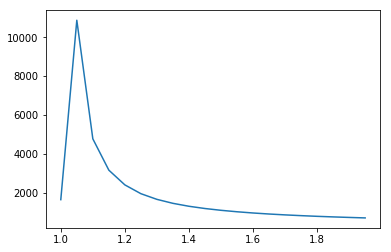

In [184]:
plt.plot([1+i*0.05 for i in range(20)], itersL)
plt.show()